In [10]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
digit=load_digits()
digit.data.shape

(1797, 64)

In [11]:
kmeans=KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digit.data)
kmeans.cluster_centers_.shape
#result output 10 clusters on 64 dimensions

(10, 64)

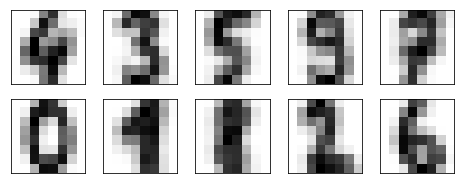

In [12]:
fig, ax=plt.subplots(2,5,figsize=(8,3))
centers= kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    # even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

In [16]:
#fix each learned cluster label with true labels
from scipy.stats import mode
import numpy as np
labels= np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask] = mode(digit.target[mask])[0]

In [18]:
#now checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digit.target, labels)
#correct grouping for 80% of input digits

0.7935447968836951

Text(91.68,0.5,'predicted label')

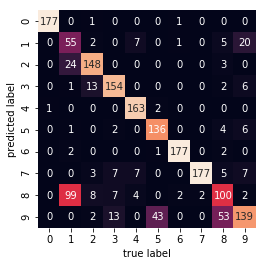

In [21]:
#now checking the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat=confusion_matrix(digit.target,labels)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',cbar=False,xticklabels=digit.target_names,yticklabels=digit.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")
#thus we can build a digit classifier without reference to any know labels

In [26]:
#Improving accuracy further more with t-distributed stochastic neighbour embedding(t-SNE) algorithm
from sklearn.manifold import TSNE
#data projection
tnse=TSNE(n_components=2, init='random',random_state=0)
digits_proj=tnse.fit_transform(digit.data)

#compute the cluster
kmeans=KMeans(n_clusters=10, random_state=0)
clusters=kmeans.fit_predict(digits_proj)

#permute the labels
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digit.target[mask])[0]
    
#compute the accuracy
accuracy_score(digit.target,labels)

0.9326655537006121

In [ ]:
#nearly 92% of classification accuaracy is obtained without using the labels:)